# INSTRUCTIONS:
#### Install plotly you would need in Geo Map subplots as part of our presentation 
*you can read on it via this link*  https://plot.ly/api/


# URLS for the project

## Neighborhood Data-Set:

#### https://www.huduser.gov/portal/datasets/fmr/smallarea/index.html

## Taxi Data-Set:

#### https://data.cityofnewyork.us/resource/74wj-s5ij.json (2010)  Yellow taxi
#### https://data.cityofnewyork.us/resource/uwyp-dntv.json (2011) Yellow taxi
#### https://data.cityofnewyork.us/resource/kerk-3eby.json (2012) Yellow taxi
#### https://data.cityofnewyork.us/resource/t7ny-aygi.json (2013) Yellow taxi
#### https://data.cityofnewyork.us/resource/gkne-dk5s.json (2014) Yellow taxi
#### https://data.cityofnewyork.us/resource/7j25-xd5y.json (2014) Green taxi




In [11]:
from IPython.display import IFrame
IFrame('https://www.google.com/maps/d/embed?mid=1VYN-6Vkk01byUCF7P13rT6ORT5g&hl=en_US', width=1000, height=480)

#<iframe src="https://www.google.com/maps/d/embed?mid=1VYN-6Vkk01byUCF7P13rT6ORT5g&hl=en_US" width="640" height="480"></iframe>


In [12]:
%matplotlib inline 
import pandas as pd
import requests 
from io import StringIO
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

In [13]:
urls = ['https://data.cityofnewyork.us/resource/7j25-xd5y.json', # 2010 yellow taxi
        'https://data.cityofnewyork.us/resource/uwyp-dntv.json', # 2011 yellow taxi
        'https://data.cityofnewyork.us/resource/kerk-3eby.json', # 2012 yellow taxi
        'https://data.cityofnewyork.us/resource/t7ny-aygi.json', # 2013 yellow taxi
        'https://data.cityofnewyork.us/resource/gkne-dk5s.json', # 2014 yellow taxi
        'https://data.cityofnewyork.us/resource/7j25-xd5y.json'] # 2014 green taxi

In [14]:
def year_url(url):
    query    = (url)
    raw_data = pd.read_json(query)
    return (raw_data)

data_010 = year_url(urls[0]) # 2010 yellow taxi
data_011 = year_url(urls[1]) # 2011 yellow taxi
data_012 = year_url(urls[2]) # 2012 yellow taxi
data_013 = year_url(urls[3]) # 2013 yellow taxi
data_014 = year_url(urls[4]) # 2014 yellow taxi

In [15]:
#cleaning the data-set for the green-taxi 2014 since its diff attributes from the yellow taxi
cols = ['dropoff_latitude', 'dropoff_longitude','lpep_dropoff_datetime','lpep_pickup_datetime','pickup_latitude',
        'pickup_longitude','tip_amount','trip_distance']

# 2014 green taxi
green_014 = pd.DataFrame(year_url(urls[5]), columns = cols)
green_014.head()

,dropoff_latitude,dropoff_longitude,lpep_dropoff_datetime,lpep_pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.813202,-73.945152,0008-01-10T20:50:52.000,0008-01-10T20:44:53.000,40.822823,-73.938164,0.0,1.07
1,40.723186,-73.942223,0011-01-03T20:02:34.000,0011-01-03T19:57:48.000,40.729080,-73.953835,2.0,1.10
2,40.634247,-74.025093,0028-01-06T00:23:00.000,0028-01-06T00:00:03.000,40.684532,-73.978569,0.0,6.09
3,40.759521,-73.778999,0016-01-01T21:48:51.000,0016-01-01T21:38:35.000,40.759911,-73.829147,0.0,2.98
4,40.709873,-74.014717,0001-01-11T01:43:23.000,0001-01-11T01:14:08.000,40.721851,-73.950264,0.0,5.70


In [38]:
# 2010
#Y_10_ur = urls[0] + '?' + 'vendor_id=VTS&payment_type=CRD&$limit=50000'
#raw_data_10 = pd.read_json(Y_10_ur)
#raw_data_10.head()
#raw_data_10.to_csv('raw_data_10_crd_vts.csv', sep='\t')


In [39]:
#2013 taxi data ==============================================
# read 50000 rows for vendors_id=VTS && payment_type=CRD
vender_type1 = "?vendor_id=VTS&payment_type=CRD&$limit=50000"
Y_13_url_1 = urls[3] + vender_type1

raw_data_13_1 = pd.read_json(Y_13_url_1)

HTTPError: HTTP Error 400: Bad Request

In [31]:
#2014 taxi data ==============================================
# read 50000 rows for vendors_id=VTS && payment_type=CRD
vender_type1 = "?vendor_id=VTS&payment_type=CRD&$limit=50000"
Y_14_url_1 = urls[4] + vender_type1

raw_data_14_1 = pd.read_json(Y_14_url_1)

In [32]:
# read 50000 rows for vendors_id=VTS && payment_type=CSH
vender_type2 = "?vendor_id=VTS&payment_type=CSH&$limit=50000"
Y_14_url_2 = urls[4] + vender_type2

raw_data_14_2 = pd.read_json(Y_14_url_2)

In [33]:
raw_data_14 = raw_data_14_1.append(raw_data_14_2, ignore_index=True)

In [38]:
# confirm the data
print(raw_data_14.head())
print(raw_data_14.tail())

# write the data into csv file
raw_data_14.to_csv('raw_data_14_crd_vts.csv', sep='\t')

          dropoff_datetime  dropoff_latitude  dropoff_longitude  fare_amount  \
0  2014-07-03T21:41:00.000         40.814325         -73.940583         14.0   
1  2014-01-01T19:20:00.000         40.702965         -73.994200         10.0   
2  2014-11-01T14:51:00.000         40.785970         -73.972570          4.5   
3  2014-10-21T08:48:00.000         40.766317         -73.952408          9.0   
4  2014-10-27T14:06:00.000         40.643880         -73.783077         52.0   

   imp_surcharge  mta_tax  passenger_count payment_type  \
0            0.5      0.5                1          CRD   
1            0.0      0.5                1          CRD   
2            0.0      0.5                1          CRD   
3            0.0      0.5                1          CRD   
4            0.0      0.5                1          CRD   

           pickup_datetime  pickup_latitude  pickup_longitude  rate_code  \
0  2014-07-03T21:29:00.000        40.765047        -73.957927          1   
1  2014-01-0

In [28]:
#save the data in array inorder to modify some attributes 
processed_data = [data_010,data_011,data_012,data_013,data_014,green_014]

#there some columns in our yellow taxi data-set that contains the same data we need but diff column name
#fix for it
for i in range(len(processed_data)):
    for j in processed_data[i].columns.values:
        if j == 'lpep_dropoff_datetime' or j == 'tpep_dropoff_datetime':
            processed_data[i].rename(columns={j: 'dropoff_datetime' }, inplace=True)
            
        if j == 'lpep_pickup_datetime'   or j == 'tpep_pickup_datetime':
            processed_data[i].rename(columns={j: 'pickup_datetime' }, inplace=True)

#cleaning other yellow taxi data-set so that it only contains the columns we need
def needed_col(data):
    cols_y = ['dropoff_latitude', 'dropoff_longitude','dropoff_datetime' , 'pickup_datetime',
              'pickup_latitude','pickup_longitude','tip_amount','trip_distance']
    refine_data = pd.DataFrame(data, columns = cols_y)
    return (refine_data)

y_data_010 = needed_col(data_010)
y_data_011 = needed_col(data_011)
y_data_012 = needed_col(data_012)
y_data_013 = needed_col(data_013)
y_data_014 = needed_col(data_014)

In [29]:
y_data_010.head()

,dropoff_latitude,dropoff_longitude,dropoff_datetime,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.813202,-73.945152,0008-01-10T20:50:52.000,0008-01-10T20:44:53.000,40.822823,-73.938164,0.0,1.07
1,40.723186,-73.942223,0011-01-03T20:02:34.000,0011-01-03T19:57:48.000,40.729080,-73.953835,2.0,1.10
2,40.634247,-74.025093,0028-01-06T00:23:00.000,0028-01-06T00:00:03.000,40.684532,-73.978569,0.0,6.09
3,40.759521,-73.778999,0016-01-01T21:48:51.000,0016-01-01T21:38:35.000,40.759911,-73.829147,0.0,2.98
4,40.709873,-74.014717,0001-01-11T01:43:23.000,0001-01-11T01:14:08.000,40.721851,-73.950264,0.0,5.70


In [30]:
y_data_011.head()

,dropoff_latitude,dropoff_longitude,dropoff_datetime,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.724422,-73.994383,2011-06-21T22:14:00.000,2011-06-21T22:03:00.000,40.707625,-74.001553,0.00,1.49
1,40.711134,-74.016117,2011-08-08T23:57:45.000,2011-08-08T23:49:24.000,40.740509,-74.005630,0.00,2.50
2,0.000000,0.000000,2011-09-15T03:58:54.000,2011-09-15T03:54:48.000,0.000000,0.000000,1.89,1.20
3,40.748888,-73.975833,2011-07-19T10:19:00.000,2011-07-19T10:08:00.000,40.747892,-73.988863,0.00,0.96
4,40.744913,-73.945500,2011-08-31T14:05:00.000,2011-08-31T13:46:00.000,40.751040,-73.945000,0.00,3.06


In [31]:
y_data_012.head()

,dropoff_latitude,dropoff_longitude,dropoff_datetime,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.770407,-73.986893,2012-06-25T20:47:00.000,2012-06-25T20:39:00.000,40.767928,-73.962740,1.0,1.70
1,40.713845,-73.997867,2012-08-11T21:44:00.000,2012-08-11T21:35:00.000,40.751447,-73.975002,0.0,1.42
2,40.727895,-73.993357,2012-02-24T06:51:48.000,2012-02-24T06:38:22.000,40.763360,-73.992565,1.0,3.20
3,40.780051,-73.956726,2012-04-26T21:36:11.000,2012-04-26T21:33:14.000,40.772920,-73.958413,0.0,0.60
4,40.762655,-74.001242,2012-06-29T09:06:31.000,2012-06-29T08:56:26.000,40.762923,-73.982564,0.0,1.30


In [32]:
y_data_013.head()

,dropoff_latitude,dropoff_longitude,dropoff_datetime,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.761542,-73.976697,2013-01-28T10:23:00.000,2013-01-28T10:20:00.000,40.762452,-73.978110,0.00,0.26
1,40.715045,-74.016115,2013-06-17T14:37:14.000,2013-06-17T14:32:06.000,40.712108,-74.010500,0.00,0.50
2,40.760480,-73.971565,2013-05-01T07:57:00.000,2013-05-01T07:40:00.000,40.737210,-73.996870,2.60,2.70
3,40.668347,-73.980303,2013-10-30T20:02:12.000,2013-10-30T19:41:24.000,40.725030,-74.005473,5.45,5.80
4,40.763215,-73.974433,2013-03-04T11:52:00.000,2013-03-04T11:44:00.000,40.751745,-73.986142,0.00,1.19


In [33]:
y_data_014.head()

,dropoff_latitude,dropoff_longitude,dropoff_datetime,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.770192,-73.918685,2014-09-20T01:59:00.000,2014-09-20T01:33:00.000,40.735232,-73.991880,0.0,6.27
1,40.767192,-73.971332,2014-05-19T10:43:00.000,2014-05-19T10:35:00.000,40.772880,-73.981728,0.0,0.82
2,40.760112,-73.972257,2014-05-07T07:05:17.000,2014-05-07T06:55:34.000,40.777891,-73.952068,2.0,1.90
3,40.773650,-73.963809,2014-03-25T19:54:10.000,2014-03-25T19:50:35.000,40.772541,-73.958471,0.0,0.30
4,40.749665,-73.991557,2014-07-07T16:12:00.000,2014-07-07T16:00:00.000,40.761137,-73.977500,0.0,1.34


In [34]:
#append the yellow taxi data-set with the green taxi data-set for 2014
y_data_014.append(green_014)
y_data_014.head()

,dropoff_latitude,dropoff_longitude,dropoff_datetime,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,trip_distance
0,40.770192,-73.918685,2014-09-20T01:59:00.000,2014-09-20T01:33:00.000,40.735232,-73.991880,0.0,6.27
1,40.767192,-73.971332,2014-05-19T10:43:00.000,2014-05-19T10:35:00.000,40.772880,-73.981728,0.0,0.82
2,40.760112,-73.972257,2014-05-07T07:05:17.000,2014-05-07T06:55:34.000,40.777891,-73.952068,2.0,1.90
3,40.773650,-73.963809,2014-03-25T19:54:10.000,2014-03-25T19:50:35.000,40.772541,-73.958471,0.0,0.30
4,40.749665,-73.991557,2014-07-07T16:12:00.000,2014-07-07T16:00:00.000,40.761137,-73.977500,0.0,1.34


E                
-73.964212
40.725870

N
-73.954141
40.739439

S
40.569736
-73.99999

W
40.626839
-73.847699

Mid = 40.638583 -73.954122

In [35]:
x_y = [40.638583, -73.954122]
radius = np.sqrt((-73.954141 + 73.954122 )**2 + (40.739439 - 40.638583)**2)

#check = ReWeek1tb2[ReWeek1tb2.DROPTIME <= '2016-11-1 05:00']

In [36]:
dropoff_brooklyn_10 = y_data_010[np.sqrt((y_data_010.dropoff_latitude - x_y[0])**2 
                                     +(y_data_010.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_10  = y_data_010[np.sqrt((y_data_010.pickup_latitude - x_y[0])**2 
                                     +(y_data_010.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_10 = pickup_brooklyn_10.append(dropoff_brooklyn_10)

#trips_in_Bk.to_csv('trips_in_BK.CSV', sep='\t')
print (pickup_brooklyn_10.shape)
print (dropoff_brooklyn_10.shape)
print (trips_in_Bk_10.shape)

(353, 8)
(319, 8)
(672, 8)


In [37]:
dropoff_brooklyn_11 = y_data_011[np.sqrt((y_data_011.dropoff_latitude - x_y[0])**2 
                                     +(y_data_011.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_11  = y_data_011[np.sqrt((y_data_011.pickup_latitude - x_y[0])**2 
                                     +(y_data_011.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_11 = pickup_brooklyn_11.append(dropoff_brooklyn_11)

trips_in_Bk_11.to_csv('trips_in_BK_11.CSV', sep='\t')
print (pickup_brooklyn_11.shape)
print (dropoff_brooklyn_11.shape)
print (trips_in_Bk_11.shape)

(172, 8)
(199, 8)
(371, 8)


In [38]:
dropoff_brooklyn_12 = y_data_012[np.sqrt((y_data_012.dropoff_latitude - x_y[0])**2 
                                     +(y_data_012.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_12  = y_data_012[np.sqrt((y_data_012.pickup_latitude - x_y[0])**2 
                                     +(y_data_012.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_12 = pickup_brooklyn_12.append(dropoff_brooklyn_12)

trips_in_Bk_12.to_csv('trips_in_BK_12.CSV', sep='\t')
print (pickup_brooklyn_12.shape)
print (dropoff_brooklyn_12.shape)
print (trips_in_Bk_12.shape)

(149, 8)
(161, 8)
(310, 8)


In [39]:
dropoff_brooklyn_13 = y_data_013[np.sqrt((y_data_013.dropoff_latitude - x_y[0])**2 
                                     +(y_data_013.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_13  = y_data_013[np.sqrt((y_data_013.pickup_latitude - x_y[0])**2 
                                     +(y_data_013.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_13 = pickup_brooklyn_13.append(dropoff_brooklyn_13)

trips_in_Bk_13.to_csv('trips_in_BK_13.CSV', sep='\t')
print (pickup_brooklyn_13.shape)
print (dropoff_brooklyn_13.shape)
print (trips_in_Bk_13.shape)

(166, 8)
(180, 8)
(346, 8)


In [40]:
dropoff_brooklyn_14 = y_data_013[np.sqrt((y_data_014.dropoff_latitude - x_y[0])**2 
                                     +(y_data_014.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_14  = y_data_013[np.sqrt((y_data_014.pickup_latitude - x_y[0])**2 
                                     +(y_data_014.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_14 = pickup_brooklyn_14.append(dropoff_brooklyn_14)

trips_in_Bk_14.to_csv('trips_in_BK_14.CSV', sep='\t')
print (pickup_brooklyn_14.shape)
print (dropoff_brooklyn_14.shape)
print (trips_in_Bk_14.shape)

(152, 8)
(177, 8)
(329, 8)


In [54]:
tb = {'2010': trips_in_Bk_10.count().iloc[0], 
      '2011': trips_in_Bk_11.count().iloc[0],
      '2012': trips_in_Bk_12.count().iloc[0],
      '2013': trips_in_Bk_13.count().iloc[0],
      '2014': trips_in_Bk_14.count().iloc[0],}
trips_in_Bk = pd.Series(tb)
trips_in_Bk


2010    672
2011    371
2012    310
2013    346
2014    329
dtype: int64

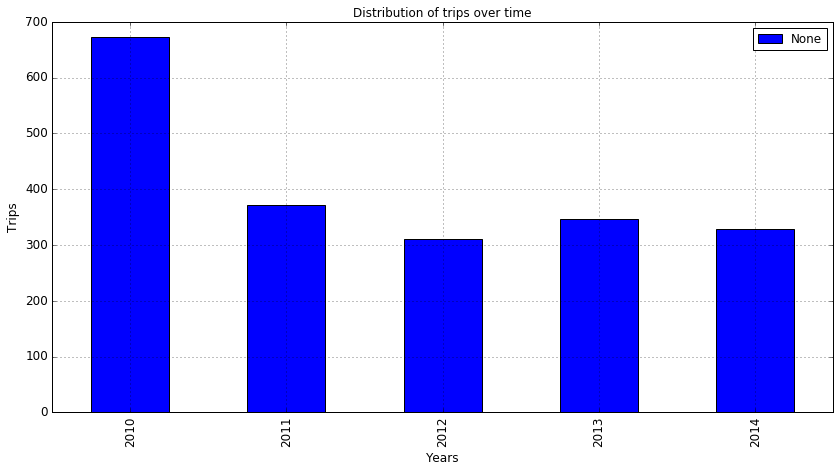

In [60]:
ax = trips_in_Bk.plot(kind='bar', title ="Distribution of trips over time", figsize=(14, 7), legend=True, fontsize=12)
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Trips", fontsize=12)
plt.grid(True)
plt.show()


[All_trips](https://smallchey.carto.com/builder/a8044a82-b7ff-11e6-8171-0ef7f98ade21/embed)

[Brooklyn_Trips_2010](https://smallchey.carto.com/builder/a50b51d0-b7e2-11e6-a982-0ecd1babdde5/embed)

[Brooklyn_Trips_2011](https://smallchey.carto.com/builder/4451bc96-b7ea-11e6-8dc3-0e98b61680bf/embed)

[Brooklyn_Trips_2012](https://smallchey.carto.com/builder/7bba8d9a-b7ed-11e6-8c80-0e3a376473ab/embed)

[Brooklyn_Trips_2013](https://smallchey.carto.com/builder/9e96c2d8-b7ee-11e6-af99-0ef24382571b/embed)

[Brooklyn_Trips_2014](https://smallchey.carto.com/builder/67c3d06a-b7ef-11e6-b61c-0ef24382571b/embed)



In [44]:


scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = y_data_014['pickup_longitude'],
        lat = y_data_014['pickup_latitude'],
        #text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            #color = df_sum_arrivals['cnt'],
            #cmax = df_sum_arrivals['cnt'].max(),
            #colorbar=dict(
               # title="Trips in BK"
            #)
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        #colorbar = True,   
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 1    
        ),
    )

#fig = dict( data=data, layout=layout )
#url = py.plot( fig, validate=False, filename='d3-airports' )
fig = Figure( data=data, layout=layout )
py.iplot(fig, filename='k')


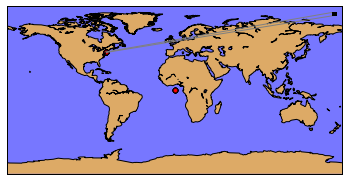

In [45]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

lons = y_data_014.pickup_longitude.values
lats = y_data_014.pickup_latitude.values
#cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
#deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
#places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)

map.scatter(x, y, c='r', alpha=0.5)

axins = zoomed_inset_axes(ax, 7, loc=1)
axins.set_xlim(-20, 0)
axins.set_ylim(3, 18)

plt.xticks(visible=False)
plt.yticks(visible=False)

map2 = Basemap(llcrnrlon=-74.260380,llcrnrlat=40.485808,
               urcrnrlon=-73.699206,urcrnrlat=40.917691, ax=axins, ellps='WGS84',
            resolution='h', area_thresh=0.6)

map2.drawmapboundary(fill_color='#7777ff')
map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map2.drawcoastlines()
map2.drawcountries()
map2.drawstates()

map2.scatter(x, y, c='r', alpha=0.5)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [46]:

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

# create the map
map = Basemap(llcrnrlon=-74.260380,llcrnrlat=40.485808,
               urcrnrlon=-73.699206,urcrnrlat=40.917691, ax=axins, ellps='WGS84',
            resolution='h', area_thresh=0.6)
# load the shape file with "states"
map.readshapefile('shapefiles/geo_export_7e54be64-4015-4221-9615-1045aa077da2',name = 'Brooklyn',drawbounds=True)

# set a geo coordinate (for example, new york)
lat = 0
lon = 0
x,y = map(lat, lon)

# place it on the map
map.plot(x, y, 'ro', markersize=4)
map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

plt.show()


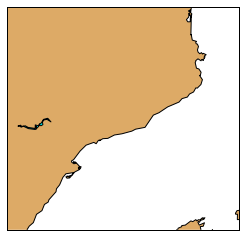

In [47]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map.drawmapboundary()
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('shapefiles/geo_export_7e54be64-4015-4221-9615-1045aa077da2', 'geo_export_7e54be64-4015-4221-9615-1045aa077da2', 
                 drawbounds=True)

plt.show()

In [64]:
y_data_014.to_csv('y_data_014.CSV', sep='\t')
y_data_014.shape

(1000, 8)

In [72]:
""""y =y_data_014.append(y_data_013)
x =y_data_012.append(y_data_011)
f1 = x.append(y)
f2 = f1.append(y_data_010)
f2.to_csv('all.CSV', sep='\t')
f2.shape"""

'"y =y_data_014.append(y_data_013)\nx =y_data_012.append(y_data_011)\nf1 = x.append(y)\nf2 = f1.append(y_data_010)\nf2.to_csv(\'all.CSV\', sep=\'\t\')\nf2.shape'